In [25]:
import pymc3 as pm
import numpy as np

# Coin Toss Example

In [106]:
rdm = np.random.default_rng(2021)

/home/bcho/.local/lib/python3.6/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


[1 1 1 0 1]
0.8


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_coin]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
The acceptance probability does not match the target. It is 0.8789378176509985, but should be close to 0.8. Try to increase the number of tuning steps.
/home/bcho/.local/lib/python3.6/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'p_coin'}>,
        <AxesSubplot:title={'center':'p_coin'}>]], dtype=object)

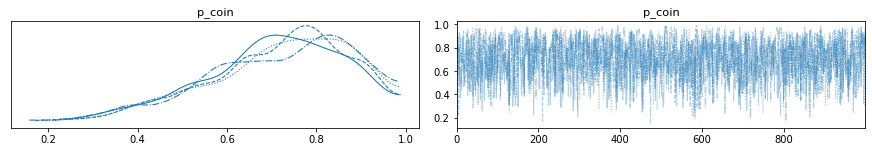

In [107]:
N = 5

coin_obs = rdm.binomial(1,0.5,N)

print(coin_obs)
print(coin_obs.mean())

with pm.Model() as coin_model:
    p_coin = pm.Uniform('p_coin',0,1)
    coin = pm.Bernoulli('coin', p_coin, observed=coin_obs)
    trace = pm.sample(1000)
    
pm.traceplot(trace)

------------
# Simple Test

obs_A:  0.05466666666666667


/home/bcho/.local/lib/python3.6/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_A]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.
/home/bcho/.local/lib/python3.6/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'p_A'}>,
        <AxesSubplot:title={'center':'p_A'}>]], dtype=object)

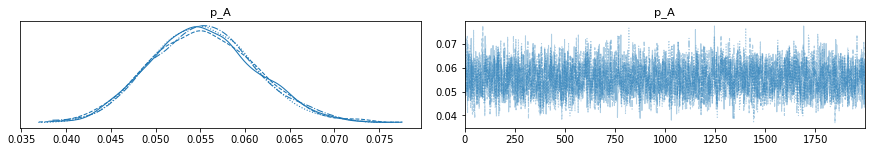

In [100]:
p_true_A = 0.05
N_A = 1500
obs_A = np.random.binomial(1, p_true_A, size=N_A)

print('obs_A: ', obs_A.mean())

with pm.Model() as ab_model:
    p_A = pm.Uniform('p_A', 0, 1)
    obs_A = pm.Bernoulli('obs_A', p_A, observed=obs_A)
    trace = pm.sample(2000)

pm.traceplot(trace)

-------------
# Example A/B Test

In [97]:
p_true_A = 0.05
p_true_B = 0.04

N_A = 1500
N_B = 500

obs_A = np.random.binomial(1, p_true_A, size=N_A)
obs_B = np.random.binomial(1, p_true_B, size=N_B)

print('obs_A: ', obs_A.mean())
print('obs_B: ', obs_B.mean())

with pm.Model() as ab_model:
    p_A = pm.Uniform('p_A', 0, 1)
    p_B = pm.Uniform('p_B', 0, 1)
    delta = pm.Deterministic('delta',p_A - p_B)
    obs_A = pm.Bernoulli('obs_A', p_A, observed=obs_A)
    osb_B = pm.Bernoulli('obs_B', p_B, observed=obs_B)

with ab_model:
    trace = pm.sample(2000)

pm.traceplot(trace)

# Example: Cheating Among Students

In [149]:
N = 100
X = 35

with pm.Model() as cheat_model:
    p_cheater = pm.Uniform('p_cheater', 0, 1)
    
    cheater = pm.Bernoulli('cheater', p_cheater, shape=N, testval=np.random.binomial(1, 0.5, N))
    first_coin_flip = pm.Bernoulli('first_flip', 0.5, shape=N, testval=np.random.binomial(1, 0.5, N))
    second_coin_flip = pm.Bernoulli('second_flip', 0.5, shape=N, testval=np.random.binomial(1, 0.5, N))
    
    obs_p = pm.Deterministic('obs_p', (cheater*first_coin_flip + (1-first_coin_flip)*second_coin_flip).sum()/float(N))
    
    obs = pm.Binomial('obs', N, obs_p, observed=X)

/home/bcho/.local/lib/python3.6/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [p_cheater]
>BinaryGibbsMetropolis: [cheater, first_flip, second_flip]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 65 seconds.
There were 432 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.08970388979722409, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.5240044458741455, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.585596036465917, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.
/home/bcho/.local/lib/python3.6/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call f

array([[<AxesSubplot:title={'center':'cheater'}>,
        <AxesSubplot:title={'center':'cheater'}>],
       [<AxesSubplot:title={'center':'first_flip'}>,
        <AxesSubplot:title={'center':'first_flip'}>],
       [<AxesSubplot:title={'center':'second_flip'}>,
        <AxesSubplot:title={'center':'second_flip'}>],
       [<AxesSubplot:title={'center':'p_cheater'}>,
        <AxesSubplot:title={'center':'p_cheater'}>],
       [<AxesSubplot:title={'center':'obs_p'}>,
        <AxesSubplot:title={'center':'obs_p'}>]], dtype=object)

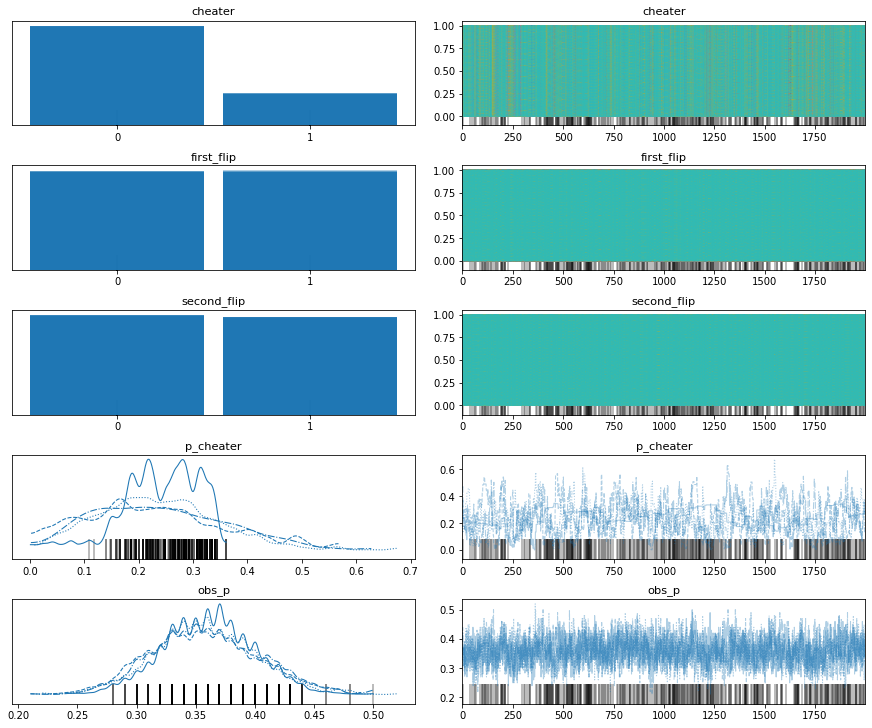

In [152]:
with cheat_model:
    trace = pm.sample(2000)
    
pm.traceplot(trace)